In [0]:
import pandas as pd
movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
ratings = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

# Desafio 1
Determine how many movie do not have ratings and what those films are.

In [6]:
movie_rating_mean = ratings.groupby("movieId")["rating"].mean()
movies_mean = movies.join(movie_rating_mean, on='movieId')
movies_without_rating = movies_mean[movies_mean.rating.isna()]
total = movies_without_rating.title.count()

print("Total movies without rating:"+str(total))
print("\nList of movies without rating:")

for i in movies_without_rating.title:
    print(" -",i)


Total movies without rating:18

List of movies without rating:
 - Innocents, The (1961)
 - Niagara (1953)
 - For All Mankind (1989)
 - Color of Paradise, The (Rang-e khoda) (1999)
 - I Know Where I'm Going! (1945)
 - Chosen, The (1981)
 - Road Home, The (Wo de fu qin mu qin) (1999)
 - Scrooge (1970)
 - Proof (1991)
 - Parallax View, The (1974)
 - This Gun for Hire (1942)
 - Roaring Twenties, The (1939)
 - Mutiny on the Bounty (1962)
 - In the Realms of the Unreal (2004)
 - Twentieth Century (1934)
 - Call Northside 777 (1948)
 - Browning Version, The (1951)
 - Chalet Girl (2011)


# Desafio 2
Rename the rating column for the dataframe **movies_mean** to mean_rating after joining.

In [7]:
movies_mean = movies.join(movie_rating_mean, on="movieId")
movies_mean = movies_mean.rename(columns={'rating': 'mean_rating'})
movies_mean

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


# Desafio 3
Put the number of ratings per movie, that is, not just the average, but the total votes per movie.

In [8]:
num_ratings = ratings.groupby('movieId').size()
num_ratings.name = 'ratings_number '
movies_mean = movies_mean.join(num_ratings,on='movieId')
movies_mean

,movieId,title,genres,mean_rating,ratings_number
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


# Desafio 4
Round as media (average grade column) to two decimal places.

In [9]:
movies_mean['mean_rating'] = movies_mean['mean_rating'].round(decimals=2)
movies_mean

,movieId,title,genres,mean_rating,ratings_number
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5
Discover the genres of the films.

In [10]:
import numpy as np

genre_movies = movies_mean.genres.str.split(pat="|")
genre = pd.Series(np.concatenate(genre_movies)).value_counts()
genre

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 6
Count the number of appearances of each genre.

In [11]:
genre

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7
Plot the appearance chart for each genre.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

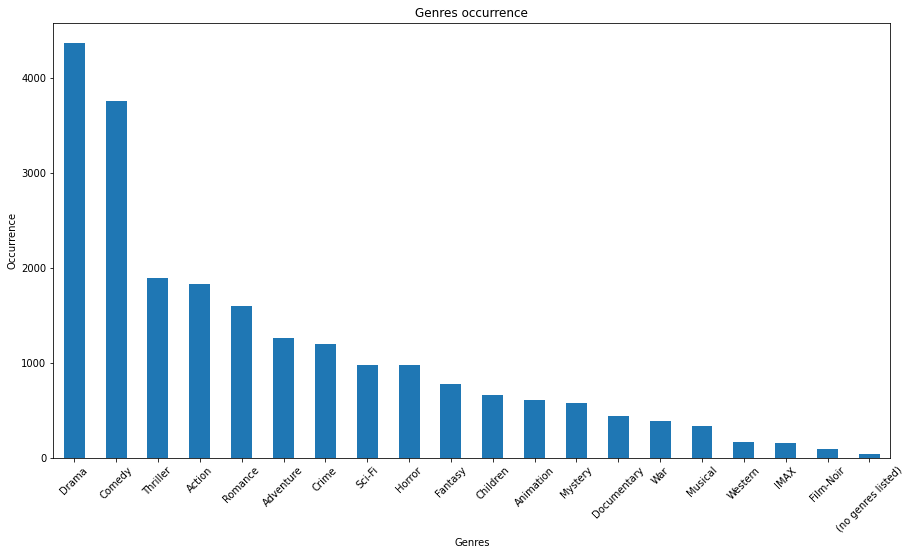

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
genre.plot(kind='bar',title='Genres occurrence')
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.xticks(rotation=45)